In [31]:
import pandas as pd 
import numpy as np 
import sklearn
import seaborn as sns 
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import preprocessing
import  matplotlib.pyplot as plt



In [32]:
data = pd.read_csv("D:\Data Science\Assignment\Assignment 14\Company_Data.csv")
data.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [33]:
data['Sales_Category'] = pd.cut(data['Sales'], bins=[0, 5, 10, 15, 20], labels=['Low', 'Medium', 'High', 'Very High'])
data.drop(columns='Sales')

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,Sales_Category
0,138,73,11,276,120,Bad,42,17,Yes,Yes,Medium
1,111,48,16,260,83,Good,65,10,Yes,Yes,High
2,113,35,10,269,80,Medium,59,12,Yes,Yes,High
3,117,100,4,466,97,Medium,55,14,Yes,Yes,Medium
4,141,64,3,340,128,Bad,38,13,Yes,No,Low
...,...,...,...,...,...,...,...,...,...,...,...
395,138,108,17,203,128,Good,33,14,Yes,Yes,High
396,139,23,3,37,120,Medium,55,11,No,Yes,Medium
397,162,26,12,368,159,Medium,40,18,Yes,Yes,Medium
398,100,79,7,284,95,Bad,50,12,Yes,Yes,Medium


In [34]:
data_mapping = {'Low': 0, 'Medium': 1, 'High': 2} 
data['Sales_Category'] = data['Sales_Category'].map(data_mapping)

In [35]:
data.drop(columns='Sales')

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,Sales_Category
0,138,73,11,276,120,Bad,42,17,Yes,Yes,1.0
1,111,48,16,260,83,Good,65,10,Yes,Yes,2.0
2,113,35,10,269,80,Medium,59,12,Yes,Yes,2.0
3,117,100,4,466,97,Medium,55,14,Yes,Yes,1.0
4,141,64,3,340,128,Bad,38,13,Yes,No,0.0
...,...,...,...,...,...,...,...,...,...,...,...
395,138,108,17,203,128,Good,33,14,Yes,Yes,2.0
396,139,23,3,37,120,Medium,55,11,No,Yes,1.0
397,162,26,12,368,159,Medium,40,18,Yes,Yes,1.0
398,100,79,7,284,95,Bad,50,12,Yes,Yes,1.0


In [36]:
shelve_mapping = {'Bad': 0, 'Medium': 1, 'Good': 2}
data['ShelveLoc_Num'] = data['ShelveLoc'].map(shelve_mapping)

In [37]:
data1 = data.drop(columns=['Urban','US','ShelveLoc'])

In [38]:
data1

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education,Sales_Category,ShelveLoc_Num
0,9.50,138,73,11,276,120,42,17,1.0,0
1,11.22,111,48,16,260,83,65,10,2.0,2
2,10.06,113,35,10,269,80,59,12,2.0,1
3,7.40,117,100,4,466,97,55,14,1.0,1
4,4.15,141,64,3,340,128,38,13,0.0,0
...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,33,14,2.0,2
396,6.14,139,23,3,37,120,55,11,1.0,1
397,7.41,162,26,12,368,159,40,18,1.0,1
398,5.94,100,79,7,284,95,50,12,1.0,0


In [39]:
x = data1.iloc[:,8:9]
y = selected_columns = data1.drop('Sales_Category', axis=1)

In [40]:
label_encoder = preprocessing.LabelEncoder()
data1['Sales_Category'] = label_encoder.fit_transform(data1['Sales_Category'])

In [43]:
from sklearn.model_selection import train_test_split
x_train,y_train,x_test,x_train = train_test_split(x,y,test_size=0.2,random_state=40)

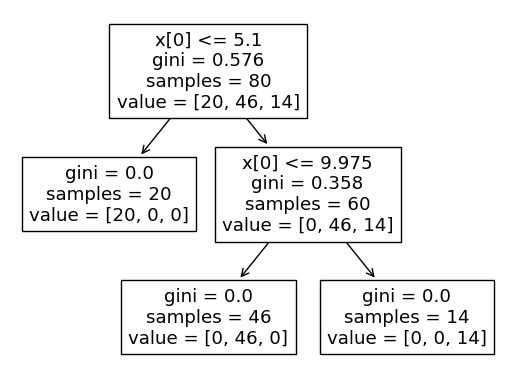

In [44]:
model = DecisionTreeClassifier(criterion='gini',max_depth=4,min_samples_split=5)
model.fit(x_train,y_train)
tree.plot_tree(model);

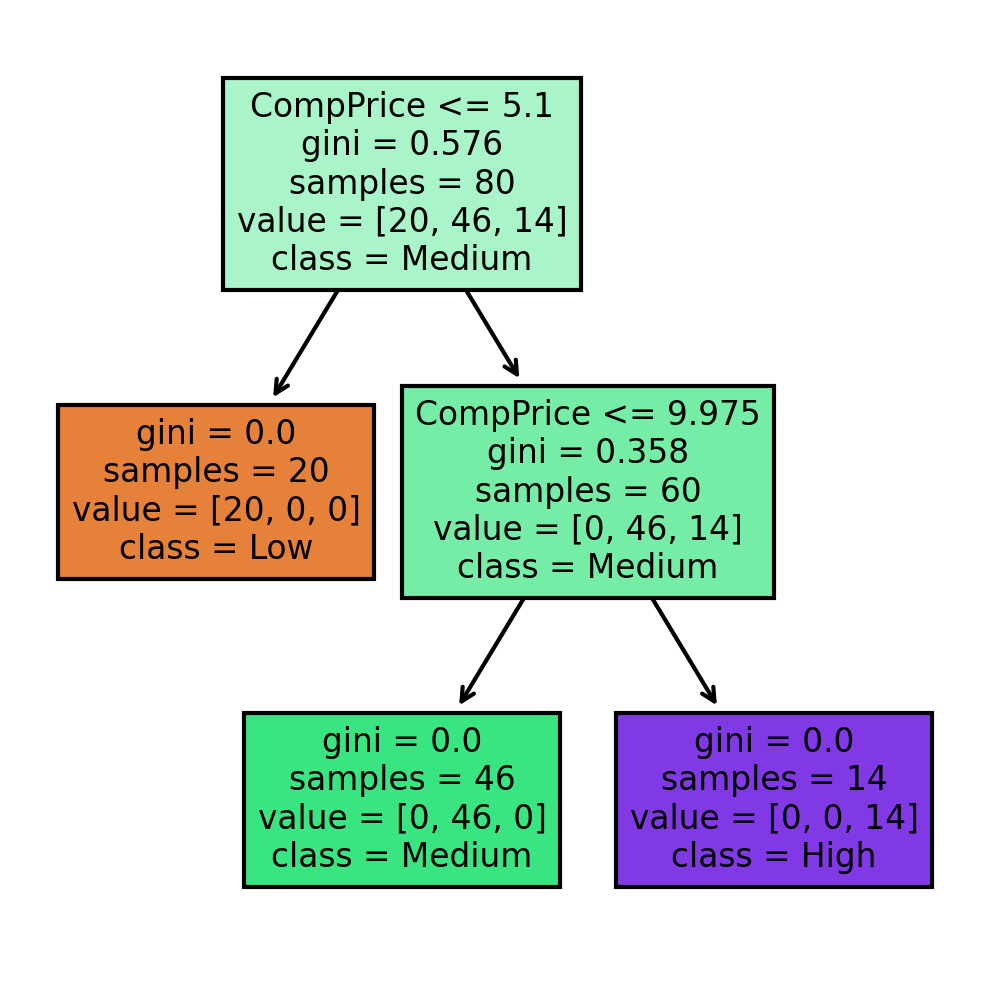

In [ ]:
fn = ['CompPrice','Income','Advertising','Population','Price','Age','Education','ShelveLoc_Num']
cn = ['Low','Medium','High']
fig , axes = plt.subplots(nrows=1,ncols=1,figsize=(4,4),dpi=300)
tree.plot_tree(model,feature_names=fn,class_names=cn,filled=True);